In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
df = pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv", encoding='latin1')

In [48]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [50]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

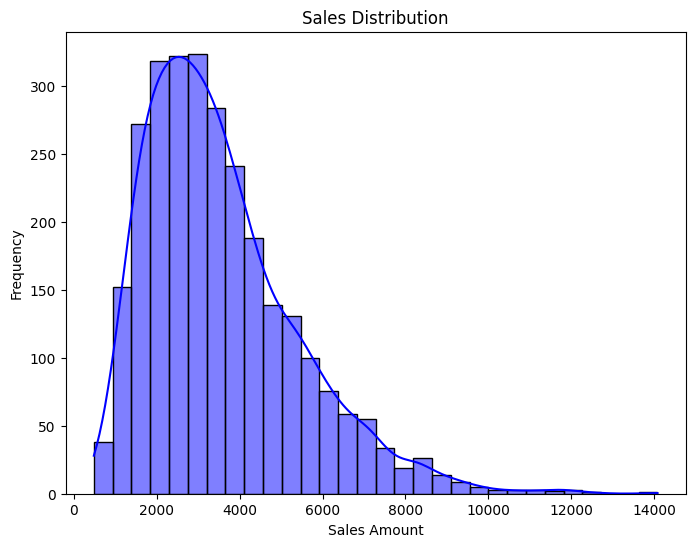

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(df['SALES'], kde=True, color='blue', bins=30)
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


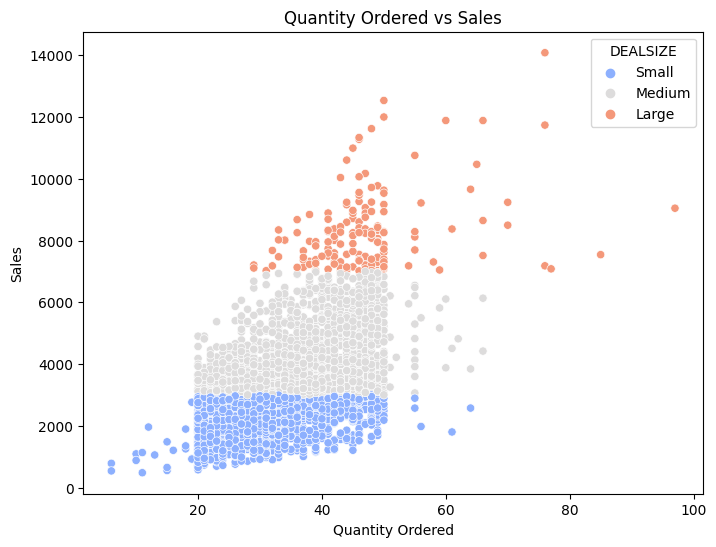

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df, hue='DEALSIZE', palette='coolwarm')
plt.title('Quantity Ordered vs Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

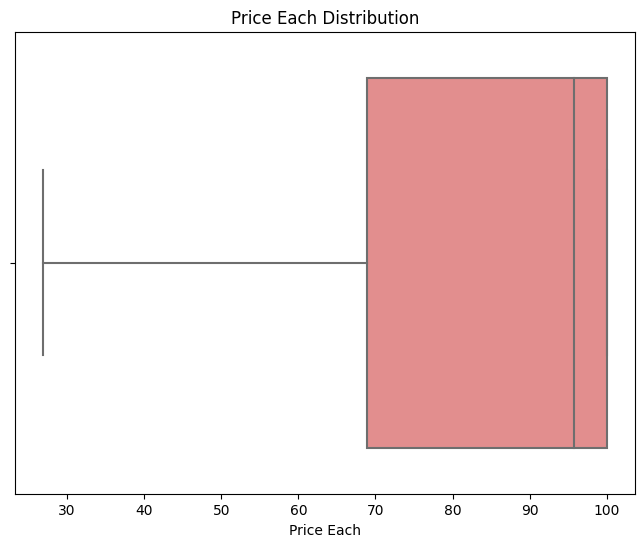

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PRICEEACH', data=df, color='lightcoral')
plt.title('Price Each Distribution')
plt.xlabel('Price Each')
plt.show()

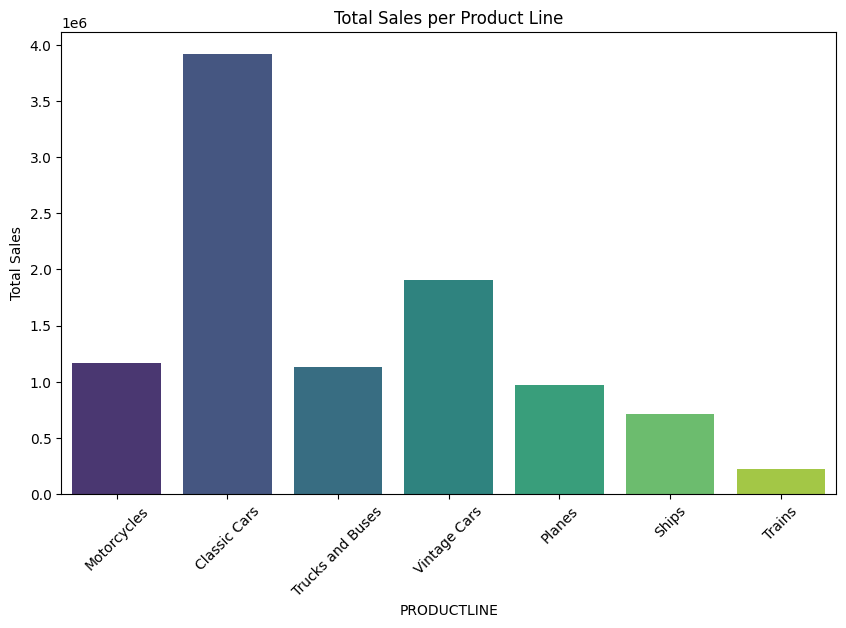

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales per Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

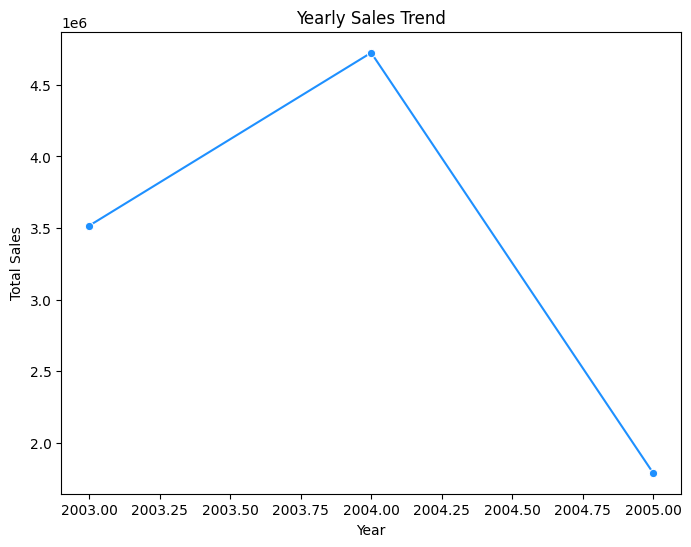

In [55]:
plt.figure(figsize=(8,6))
sales_per_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
sns.lineplot(x='YEAR_ID', y='SALES', data=sales_per_year, marker='o', color='dodgerblue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

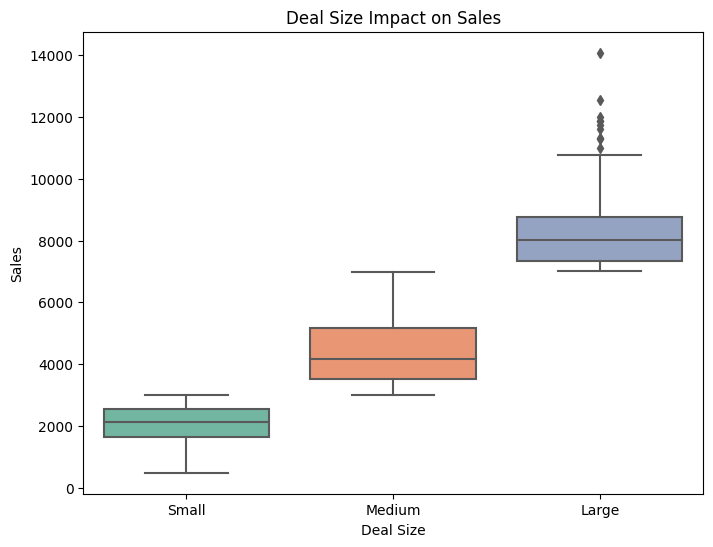

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df, palette='Set2')
plt.title('Deal Size Impact on Sales')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()

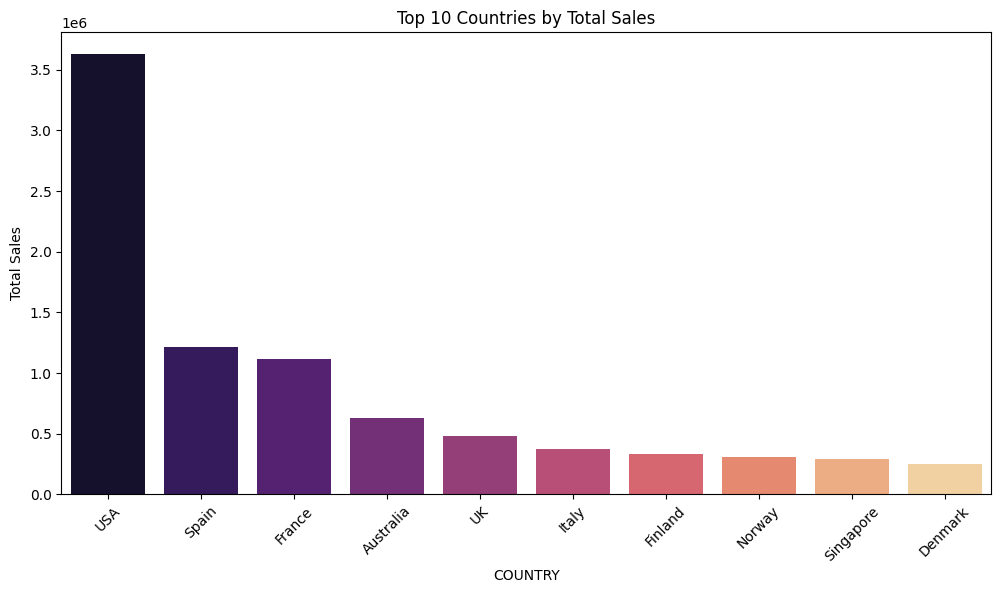

In [57]:
plt.figure(figsize=(12,6))
top_countries = df.groupby('COUNTRY')['SALES'].sum().nlargest(10).reset_index()
sns.barplot(x='COUNTRY', y='SALES', data=top_countries, palette='magma')
plt.title('Top 10 Countries by Total Sales')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

In [58]:
# Select numerical features for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
X = df[features]

In [59]:
# Handle missing values (if any)
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


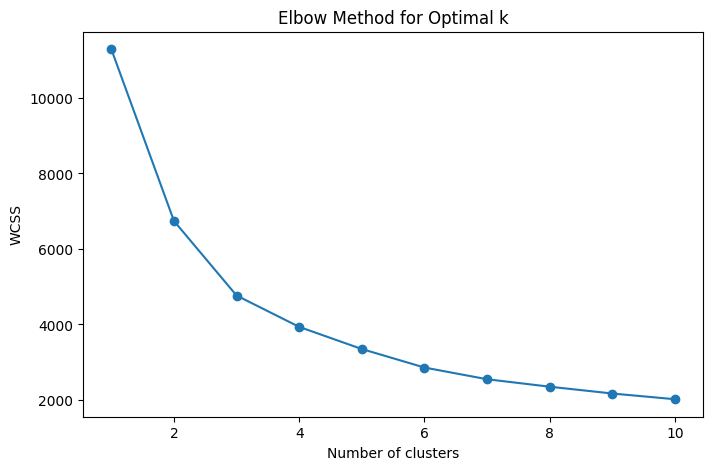

In [60]:
# Calculate WCSS for different cluster sizes
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

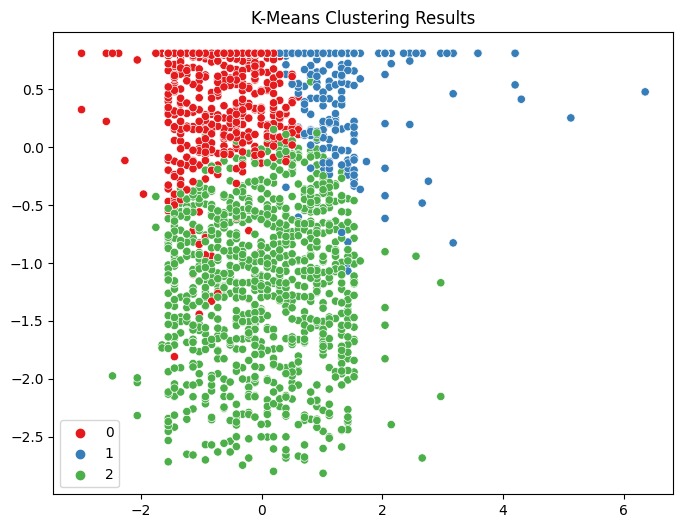

In [61]:
# Choose k based on the elbow method, e.g., k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering Results')
plt.show()


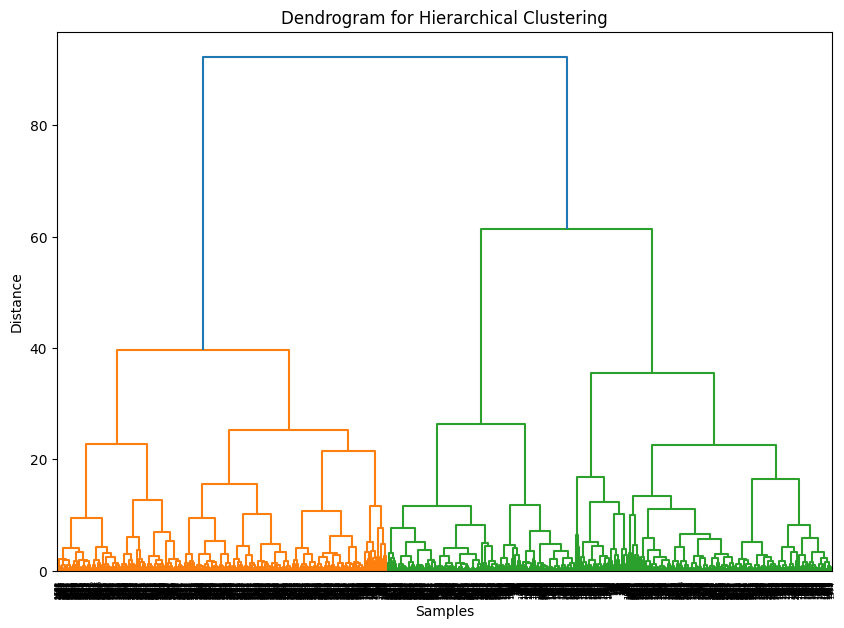

In [62]:
# Generate linkage matrix using the 'ward' method
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


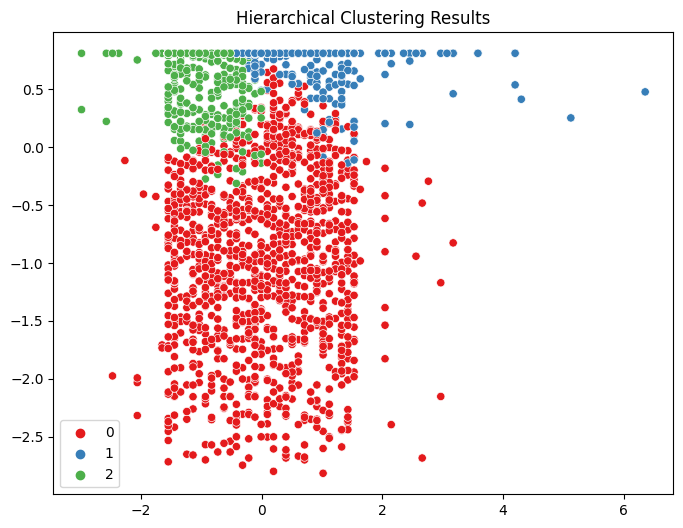

In [63]:
# Choose the number of clusters, e.g., 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_clusters = hierarchical_clustering.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['HC_Cluster'] = hc_clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=hc_clusters, palette='Set1')
plt.title('Hierarchical Clustering Results')
plt.show()


In [64]:
# Inertia for K-Means
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

from sklearn.metrics import silhouette_score
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score (K-Means): {kmeans_silhouette}')
# Silhouette Score for Hierarchical Clustering
hc_silhouette = silhouette_score(X_scaled, hc_clusters)
print(f'Silhouette Score (Hierarchical): {hc_silhouette}')

from sklearn.metrics import davies_bouldin_score
# Davies-Bouldin Index for K-Means
kmeans_dbi = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index (K-Means): {kmeans_dbi}')
# Davies-Bouldin Index for Hierarchical Clustering
hc_dbi = davies_bouldin_score(X_scaled, hc_clusters)
print(f'Davies-Bouldin Index (Hierarchical): {hc_dbi}')

from sklearn.metrics import calinski_harabasz_score
# Calinski-Harabasz Index for K-Means
kmeans_ch = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index (K-Means): {kmeans_ch}')
# Calinski-Harabasz Index for Hierarchical Clustering
hc_ch = calinski_harabasz_score(X_scaled, hc_clusters)
print(f'Calinski-Harabasz Index (Hierarchical): {hc_ch}')

Inertia: 4766.017133863959
Silhouette Score (K-Means): 0.3504523735351092
Silhouette Score (Hierarchical): 0.31527494740967016
Davies-Bouldin Index (K-Means): 1.0091895570978797
Davies-Bouldin Index (Hierarchical): 0.9888199869306714
Calinski-Harabasz Index (K-Means): 1930.6761983442068
Calinski-Harabasz Index (Hierarchical): 1672.3553032169289
